# **Выбор датасета**

В качестве исходных данных для исследования выбран датасет Wine Quality Dataset (Red Wine), содержащий химические характеристики красного вина и его оценку качества. Датасет взят из UCI Machine Learning Repository, где он используется для задач анализа качества вина на основе его физических и химических параметров.

Данный датасет содержит 1599 наблюдений и 12 признаков, включая уровни кислотности, содержание сахара, pH, плотность и процентное содержание алкоголя. Основная цель анализа — предсказать качество вина на основе его химических характеристик.

Для решения поставленных задач выбраны следующие целевые переменные:

Классификация: предсказание переменной quality, преобразованной в бинарный формат:
0 (плохое вино) — если quality ≤ 5
1 (хорошее вино) — если quality ≥ 6

Регрессия: предсказание уровня алкоголя (alcohol), который является непрерывным числовым признаком.

Анализ качества вина на основе его химических характеристик имеет широкое применение в винодельческой промышленности, розничной торговле и контроле качества продукции.

Контроль качества и стандартизация продукции
Винодельческие компании стремятся обеспечивать стабильное качество своей продукции. Автоматизированный анализ химических параметров позволяет выявлять несоответствия стандартам, прогнозировать качество напитка и оптимизировать производственный процесс.

Оптимизация рецептуры и технологии производства
Исследование зависимости качества вина от его химических характеристик помогает производителям корректировать технологические процессы, такие как ферментация, выдержка и добавление определенных ингредиентов, для получения вина с предсказуемыми характеристиками.

Маркетинг и ценообразование
Качество вина является одним из ключевых факторов, влияющих на его стоимость. Анализ данных позволяет сегментировать продукцию по качественным характеристикам и корректно формировать ценовую политику.

Анализ предпочтений потребителей
Использование машинного обучения позволяет предсказывать, какие параметры наиболее важны для потребителей и какие химические характеристики влияют на восприятие вкуса. Это может быть полезно для разработки новых сортов вина, ориентированных на предпочтения различных категорий покупателей.

Автоматизированная система оценки вина
В лабораторных условиях оценка качества вина обычно проводится экспертами-дегустаторами, однако такой метод субъективен. Использование машинного обучения позволяет разработать объективные модели предсказания качества, которые можно интегрировать в системы автоматизированного контроля.

# **Выбор метрик**

Для оценки производительности моделей используются стандартные метрики.

Для задачи классификации (предсказание quality_binary):

Accuracy (Точность) – доля правильно классифицированных объектов среди всех.
F1-score – гармоническое среднее между точностью (precision) и полнотой (recall), особенно полезное при несбалансированных данных.

Для задачи регрессии (предсказание alcohol):

Mean Squared Error (MSE) – среднеквадратичная ошибка, измеряющая среднюю разницу между предсказанными и истинными значениями.
R² Score (коэффициент детерминации) – показывает, насколько хорошо модель объясняет вариацию зависимой переменной.

# Алгоритм KNN

## Задача Классификации и Регрессии

Перед началом работы необходимо загрузить данные и провести их первичный анализ. Датасет представлен в формате CSV и содержит данные о физических и химических характеристиках красного вина. Загрузка осуществляется с помощью библиотеки pandas.

После загрузки данных важно проверить их структуру и убедиться в корректности представления признаков. Для этого используются методы .head(), позволяющие вывести первые несколько строк датасета, а также .info(), предоставляющий информацию о типах данных и наличии пропущенных значений.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Загрузка данных
file_path = "winequality-red.csv"
data = pd.read_csv(file_path, sep=';')

# Просмотр данных
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<Axes: >

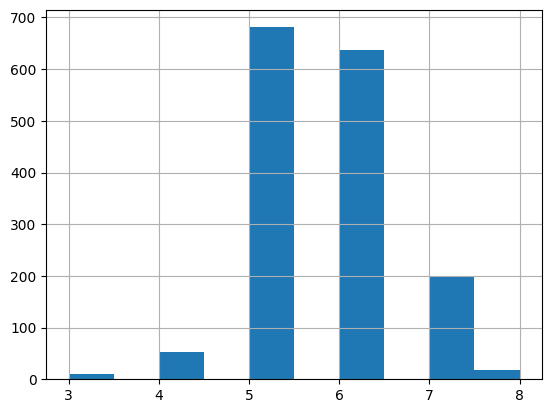

In [2]:
data.quality.hist()

## Предобработка данных

На данном этапе выполняется подготовка данных для обучения моделей. Первым шагом является преобразование целевой переменной quality, которая изначально представлена в виде категориальной оценки качества вина. Для задачи классификации эта переменная переводится в бинарный формат: значения quality больше или равные 6 обозначаются как 1 (хорошее вино), а значения менее 6 — как 0 (плохое вино).

Далее выполняется разделение данных на признаки X и целевые переменные y. Для задачи классификации целевая переменная y_classification представлена новым бинарным признаком quality_binary, а для задачи регрессии в качестве целевой переменной y_regression используется уровень содержания алкоголя alcohol.

Чтобы избежать утечки данных и проверить модели на независимых примерах, набор данных делится на обучающую выборку (80% данных) и тестовую выборку (20%). Это делается отдельно для задачи классификации и задачи регрессии.

Так как признаки в датасете измеряются в разных единицах и имеют различные масштабы, применяется стандартизация данных с использованием StandardScaler. Этот метод приводит все признаки к единому масштабу со средним значением 0 и стандартным отклонением 1, что улучшает работу алгоритмов машинного обучения. Стандартизация выполняется отдельно для обучающей и тестовой выборок, чтобы избежать утечки информации из тестовой выборки в процессе обучения.

In [3]:

# Преобразование целевой переменной в бинарный признак
data['quality_binary'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Разделение данных
X = data.drop(['quality', 'quality_binary'], axis=1)
y_classification = data['quality_binary']
y_regression = data['alcohol']

# Разделение на обучающую и тестовую выборки
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Стандартизация данных
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


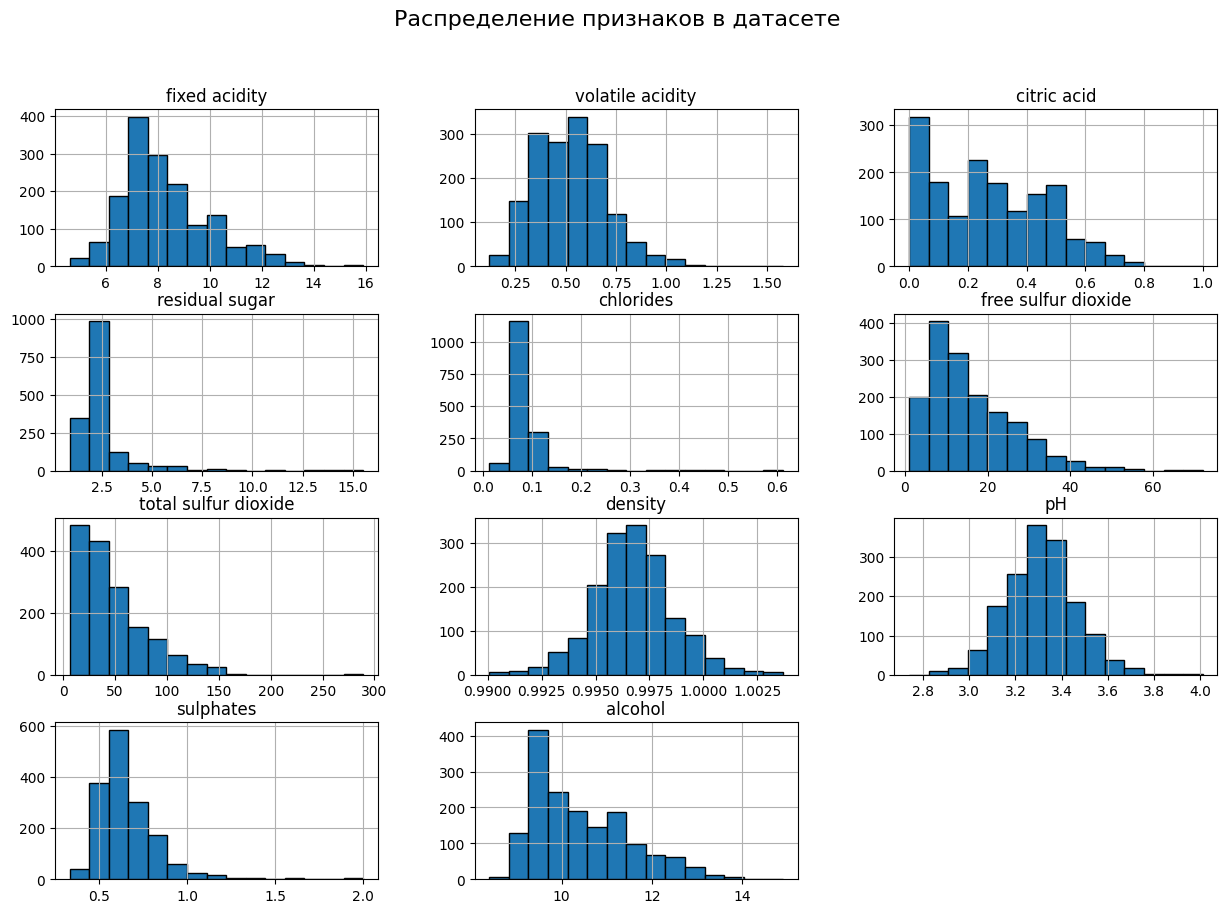

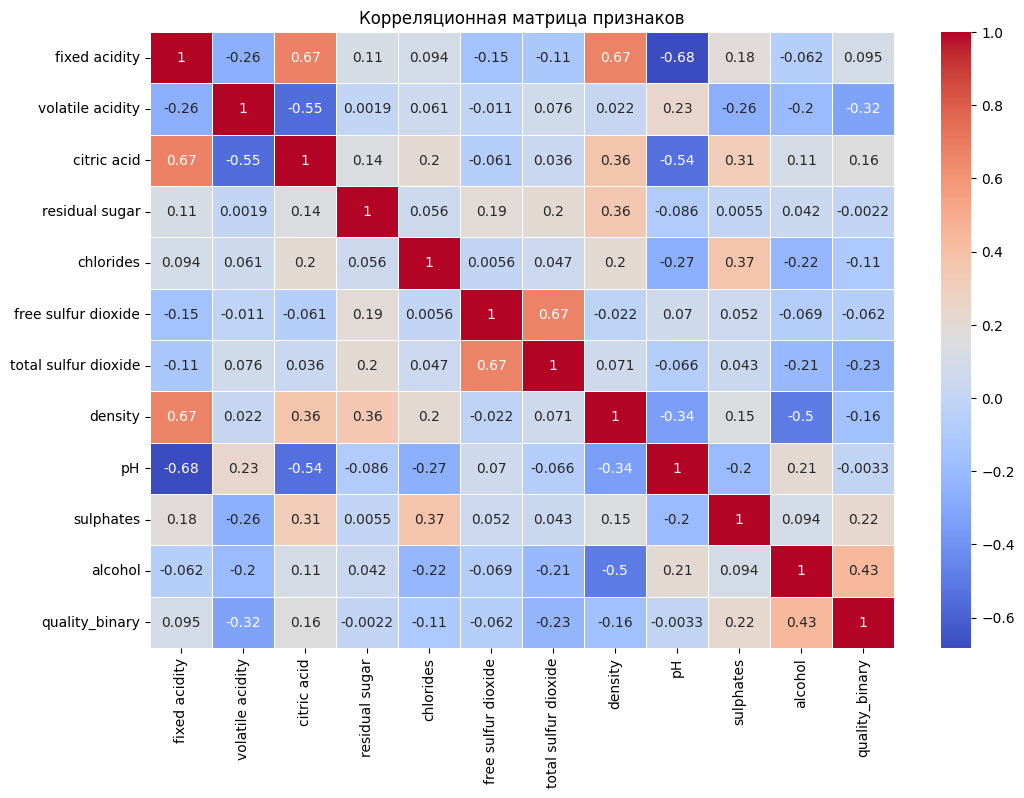

/var/folders/jj/hxk3lkds6z50flx1pq29zqr00000gp/T/ipykernel_42409/2430001713.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['quality_binary'], palette="viridis")


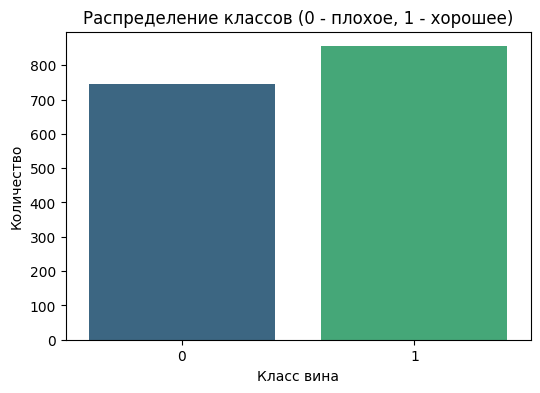

In [4]:

# Визуализация распределения признаков
data.drop(columns=["quality", "quality_binary"]).hist(bins=15, figsize=(15, 10), edgecolor="black")
plt.suptitle("Распределение признаков в датасете", fontsize=16)
plt.show()

# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(columns=["quality"]).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Корреляционная матрица признаков")
plt.show()

# Баланс классов
plt.figure(figsize=(6, 4))
sns.countplot(x=data['quality_binary'], palette="viridis")
plt.title("Распределение классов (0 - плохое, 1 - хорошее)")
plt.xlabel("Класс вина")
plt.ylabel("Количество")
plt.show()


In [5]:

# KNN классификация
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_clf = knn_clf.predict(X_test_clf_scaled)

# Оценка модели KNN (классификация)
accuracy_knn_clf = accuracy_score(y_test_clf, y_pred_clf)
f1_knn_clf = f1_score(y_test_clf, y_pred_clf)
print(f"KNN (Classification) - Accuracy: {accuracy_knn_clf:.4f}, F1 Score: {f1_knn_clf:.4f}")

# KNN регрессия
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg = knn_reg.predict(X_test_reg_scaled)

# Оценка модели KNN (регрессия)
mse_knn_reg = mean_squared_error(y_test_reg, y_pred_reg)
print(f"KNN (Regression) - MSE: {mse_knn_reg:.4f}")


KNN (Classification) - Accuracy: 0.7063, F1 Score: 0.7473
KNN (Regression) - MSE: 0.1009


## Оптимизация параметра K в алгоритме K-Nearest Neighbors

Алгоритм K-ближайших соседей (KNN) является одним из базовых методов машинного обучения, где ключевым гиперпараметром является количество соседей K. Выбор оптимального значения K напрямую влияет на качество модели:

Слишком маленькое значение K делает модель чувствительной к шуму, что может привести к переобучению.
Слишком большое значение K сглаживает границы между классами, что может ухудшить точность предсказаний.
Для подбора оптимального значения K применяется метод GridSearchCV, который перебирает различные значения параметра из указанного диапазона (1 до 20) и оценивает модель с использованием кросс-валидации (cv=5).

В процессе оптимизации подбираются лучшие значения K отдельно для задач классификации и регрессии:

В задаче классификации (KNeighborsClassifier) в качестве критерия оценки используется accuracy (точность).
В задаче регрессии (KNeighborsRegressor) используется MSE (среднеквадратичная ошибка), при этом GridSearchCV работает с neg_mean_squared_error, поскольку алгоритм пытается максимизировать метрику.
После выполнения поиска GridSearchCV возвращает оптимальное значение K, которое затем используется для финального обучения модели.

In [6]:

# Оптимизация KNN (поиск лучшего K)
param_grid = {'n_neighbors': range(1, 21)}
grid_search_clf = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search_clf.fit(X_train_clf_scaled, y_train_clf)
best_k_clf = grid_search_clf.best_params_["n_neighbors"]
print(f"Лучший K для KNN (классификация): {best_k_clf}")

grid_search_reg = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_reg.fit(X_train_reg_scaled, y_train_reg)
best_k_reg = grid_search_reg.best_params_["n_neighbors"]
print(f"Лучший K для KNN (регрессия): {best_k_reg}")


Лучший K для KNN (классификация): 1
Лучший K для KNN (регрессия): 4


In [7]:
# Обучение KNN с оптимальным K (классификация)
knn_clf_optimized = KNeighborsClassifier(n_neighbors=1)
knn_clf_optimized.fit(X_train_clf_scaled, y_train_clf)
y_pred_clf_optimized = knn_clf_optimized.predict(X_test_clf_scaled)

# Оценка улучшенной модели (классификация)
accuracy_clf_optimized = accuracy_score(y_test_clf, y_pred_clf_optimized)
f1_clf_optimized = f1_score(y_test_clf, y_pred_clf_optimized)

print(f"Улучшенный KNN (Классификация) - Accuracy: {accuracy_clf_optimized:.4f}, F1 Score: {f1_clf_optimized:.4f}")

# Обучение KNN с оптимальным K (регрессия)
knn_reg_optimized = KNeighborsRegressor(n_neighbors=4)
knn_reg_optimized.fit(X_train_reg_scaled, y_train_reg)
y_pred_reg_optimized = knn_reg_optimized.predict(X_test_reg_scaled)

# Оценка улучшенной модели (регрессия)
mse_reg_optimized = mean_squared_error(y_test_reg, y_pred_reg_optimized)

print(f"Улучшенный KNN (Регрессия) - MSE: {mse_reg_optimized:.4f}")


Улучшенный KNN (Классификация) - Accuracy: 0.7531, F1 Score: 0.7859
Улучшенный KNN (Регрессия) - MSE: 0.0975


In [8]:
class CustomKNN:
    def __init__(self, n_neighbors=5, mode='classification'):
        self.n_neighbors = n_neighbors
        self.mode = mode  # 'classification' или 'regression'

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []

        for x in X_test:
            # Вычисление расстояния (евклидово расстояние)
            distances = np.linalg.norm(self.X_train - x, axis=1)
            
            # Индексы K ближайших соседей
            nearest_indices = np.argsort(distances)[:self.n_neighbors]
            
            # Значения целевой переменной ближайших соседей
            nearest_labels = self.y_train[nearest_indices]
            
            # Классификация - выбираем наиболее частый класс
            if self.mode == 'classification':
                prediction = np.bincount(nearest_labels).argmax()
            
            # Регрессия - усредняем значения целевой переменной
            else:
                prediction = np.mean(nearest_labels)
            
            predictions.append(prediction)

        return np.array(predictions)


In [9]:
# Обучение собственного KNN (классификация)
custom_knn_clf = CustomKNN(n_neighbors=1, mode='classification')
custom_knn_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_custom_clf = custom_knn_clf.predict(X_test_clf_scaled)

# Оценка модели (классификация)
accuracy_custom_clf = accuracy_score(y_test_clf, y_pred_custom_clf)
f1_custom_clf = f1_score(y_test_clf, y_pred_custom_clf)

print(f"Собственная реализация KNN (Классификация) - Accuracy: {accuracy_custom_clf:.4f}, F1 Score: {f1_custom_clf:.4f}")

# Обучение собственного KNN (регрессия)
custom_knn_reg = CustomKNN(n_neighbors=4, mode='regression')
custom_knn_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_custom_reg = custom_knn_reg.predict(X_test_reg_scaled)

# Оценка модели (регрессия)
mse_custom_reg = mean_squared_error(y_test_reg, y_pred_custom_reg)

print(f"Library KNN MSE: {mse_reg_optimized:.6f}, Custom KNN MSE: {mse_custom_reg:.6f}")


Собственная реализация KNN (Классификация) - Accuracy: 0.7531, F1 Score: 0.7859
Library KNN MSE: 0.097535, Custom KNN MSE: 0.097535


In [10]:
# Вывод результатов сравнения KNN
print("Сравнение результатов KNN (Классификация):")
print(f"Library KNN Accuracy: {accuracy_clf_optimized:.4f}, Custom KNN Accuracy: {accuracy_custom_clf:.4f}")
print(f"Library KNN F1-Score: {f1_clf_optimized:.4f}, Custom KNN F1-Score: {f1_custom_clf:.4f}")

print("\nСравнение результатов KNN (Регрессия):")
print(f"Library KNN MSE: {mse_reg_optimized:.6f}, Custom KNN MSE: {mse_custom_reg:.6f}")


Сравнение результатов KNN (Классификация):
Library KNN Accuracy: 0.7531, Custom KNN Accuracy: 0.7531
Library KNN F1-Score: 0.7859, Custom KNN F1-Score: 0.7859

Сравнение результатов KNN (Регрессия):
Library KNN MSE: 0.097535, Custom KNN MSE: 0.097535


# Алгоритм Линейных моделей

In [11]:
# Импорт библиотек
import pandas as pd

# Загрузка данных
file_path = "winequality-red.csv"
data = pd.read_csv(file_path, sep=';')

# Преобразование целевой переменной для классификации (бинаризация качества вина)
data['quality_binary'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Просмотр первых строк
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [12]:
# Определение данных для регрессии
X_regression = data.drop(columns=['alcohol'])
y_regression = data['alcohol']

# Просмотр первых строк
X_regression.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0


In [13]:
print("Выбранные метрики качества:")
print("- Accuracy (для классификации) – общая точность модели")
print("- F1-Score (для классификации) – баланс точности и полноты")
print("- Mean Squared Error (MSE) (для регрессии) – средняя ошибка предсказания")


Выбранные метрики качества:
- Accuracy (для классификации) – общая точность модели
- F1-Score (для классификации) – баланс точности и полноты
- Mean Squared Error (MSE) (для регрессии) – средняя ошибка предсказания


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных для классификации
X_classification = data.drop(columns=['quality', 'quality_binary'])
y_classification = data['quality_binary']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

# Разделение данных для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


In [15]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix, ConfusionMatrixDisplay

# Классификация: Логистическая регрессия
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_clf_scaled, y_train_clf)
y_pred_log_reg = log_reg.predict(X_test_clf_scaled)

accuracy_log_reg = accuracy_score(y_test_clf, y_pred_log_reg)
f1_log_reg = f1_score(y_test_clf, y_pred_log_reg)

print(f"Бейзлайн Логистическая Регрессия - Accuracy: {accuracy_log_reg:.4f}, F1 Score: {f1_log_reg:.4f}")

# Регрессия: Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin_reg = lin_reg.predict(X_test_reg_scaled)

mse_lin_reg = mean_squared_error(y_test_reg, y_pred_lin_reg)

print(f"Бейзлайн Линейная Регрессия - MSE: {mse_lin_reg:.6f}")


Бейзлайн Логистическая Регрессия - Accuracy: 0.7406, F1 Score: 0.7608
Бейзлайн Линейная Регрессия - MSE: 0.345823


In [16]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для логистической регрессии
param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search_log = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_log, cv=5, scoring='accuracy')
grid_search_log.fit(X_train_clf_scaled, y_train_clf)
best_C_log = grid_search_log.best_params_["C"]

# Подбор гиперпараметров для линейной регрессии
param_grid_lin = {'fit_intercept': [True, False]}
grid_search_lin = GridSearchCV(LinearRegression(), param_grid_lin, cv=5, scoring='neg_mean_squared_error')
grid_search_lin.fit(X_train_reg_scaled, y_train_reg)
best_fit_intercept = grid_search_lin.best_params_["fit_intercept"]

print(f"Лучший C для Логистической Регрессии: {best_C_log}")
print(f"Лучший параметр fit_intercept для Линейной Регрессии: {best_fit_intercept}")


Лучший C для Логистической Регрессии: 1
Лучший параметр fit_intercept для Линейной Регрессии: True


In [17]:
# Обучение с оптимальными параметрами
log_reg_optimized = LogisticRegression(C=best_C_log, max_iter=1000)
log_reg_optimized.fit(X_train_clf_scaled, y_train_clf)
y_pred_log_reg_optimized = log_reg_optimized.predict(X_test_clf_scaled)

accuracy_log_reg_optimized = accuracy_score(y_test_clf, y_pred_log_reg_optimized)
f1_log_reg_optimized = f1_score(y_test_clf, y_pred_log_reg_optimized)

print(f"Оптимизированная Логистическая Регрессия - Accuracy: {accuracy_log_reg_optimized:.4f}, F1 Score: {f1_log_reg_optimized:.4f}")

lin_reg_optimized = LinearRegression(fit_intercept=best_fit_intercept)
lin_reg_optimized.fit(X_train_reg_scaled, y_train_reg)
y_pred_lin_reg_optimized = lin_reg_optimized.predict(X_test_reg_scaled)

mse_lin_reg_optimized = mean_squared_error(y_test_reg, y_pred_lin_reg_optimized)

print(f"Оптимизированная Линейная Регрессия - MSE: {mse_lin_reg_optimized:.6f}")


Оптимизированная Логистическая Регрессия - Accuracy: 0.7406, F1 Score: 0.7608
Оптимизированная Линейная Регрессия - MSE: 0.345823


In [18]:
import numpy as np

class CustomLinearRegression:
    def __init__(self):
        self.coefficients = None

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Добавляем столбец для свободного члена
        self.coefficients = np.linalg.inv(X.T @ X) @ X.T @ y  # Решение нормального уравнения

    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return X @ self.coefficients


In [19]:
custom_lin_reg = CustomLinearRegression()
custom_lin_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_custom_lin = custom_lin_reg.predict(X_test_reg_scaled)

mse_custom_lin = mean_squared_error(y_test_reg, y_pred_custom_lin)

print(f"Собственная Линейная Регрессия - MSE: {mse_custom_lin:.6f}")


Собственная Линейная Регрессия - MSE: 0.345823


Сравнение результатов Линейной Регрессии:
Library Linear Regression MSE: 0.345823, Custom Linear Regression MSE: 0.345823


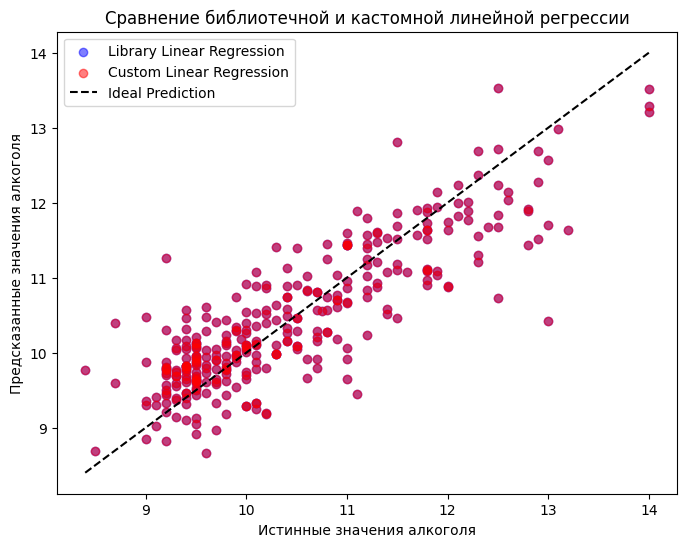

In [20]:
# Сравнение библиотечной модели и кастомной реализации линейной регрессии

# Оценка библиотечной линейной регрессии
y_pred_lib_lin = lin_reg_optimized.predict(X_test_reg_scaled)
mse_lib_lin = mean_squared_error(y_test_reg, y_pred_lib_lin)

# Оценка кастомной линейной регрессии
y_pred_custom_lin = custom_lin_reg.predict(X_test_reg_scaled)
mse_custom_lin = mean_squared_error(y_test_reg, y_pred_custom_lin)

# Вывод результатов сравнения
print("Сравнение результатов Линейной Регрессии:")
print(f"Library Linear Regression MSE: {mse_lib_lin:.6f}, Custom Linear Regression MSE: {mse_custom_lin:.6f}")

# График сравнения предсказаний библиотечной и кастомной моделей
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_lib_lin, alpha=0.5, label="Library Linear Regression", color="blue")
plt.scatter(y_test_reg, y_pred_custom_lin, alpha=0.5, label="Custom Linear Regression", color="red")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color="black", linestyle="--", label="Ideal Prediction")
plt.xlabel("Истинные значения алкоголя")
plt.ylabel("Предсказанные значения алкоголя")
plt.title("Сравнение библиотечной и кастомной линейной регрессии")
plt.legend()
plt.show()


# Алгоритм Рещающее дерево

In [21]:
# Импорт библиотек
import pandas as pd

# Загрузка данных
file_path = "winequality-red.csv"
data = pd.read_csv(file_path, sep=';')

# Преобразование целевой переменной для классификации (бинаризация качества вина)
data['quality_binary'] = data['quality'].apply(lambda x: 1 if x >= 6 else 0)

# Просмотр первых строк
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [22]:
# Определение данных для регрессии
X_regression = data.drop(columns=['alcohol'])
y_regression = data['alcohol']

# Просмотр первых строк
X_regression.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0


In [23]:
print("Выбранные метрики качества:")
print("- Accuracy (для классификации) – общая точность модели")
print("- F1-Score (для классификации) – баланс точности и полноты")
print("- Mean Squared Error (MSE) (для регрессии) – средняя ошибка предсказания")


Выбранные метрики качества:
- Accuracy (для классификации) – общая точность модели
- F1-Score (для классификации) – баланс точности и полноты
- Mean Squared Error (MSE) (для регрессии) – средняя ошибка предсказания


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных для классификации
X_classification = data.drop(columns=['quality', 'quality_binary'])
y_classification = data['quality_binary']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

# Разделение данных для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


In [25]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Классификация: Решающее дерево
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_tree_clf = tree_clf.predict(X_test_clf_scaled)

accuracy_tree_clf = accuracy_score(y_test_clf, y_pred_tree_clf)
f1_tree_clf = f1_score(y_test_clf, y_pred_tree_clf)

print(f"Бейзлайн Решающее Дерево (Классификация) - Accuracy: {accuracy_tree_clf:.4f}, F1 Score: {f1_tree_clf:.4f}")

# Регрессия: Решающее дерево
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_tree_reg = tree_reg.predict(X_test_reg_scaled)

mse_tree_reg = mean_squared_error(y_test_reg, y_pred_tree_reg)

print(f"Бейзлайн Решающее Дерево (Регрессия) - MSE: {mse_tree_reg:.6f}")


Бейзлайн Решающее Дерево (Классификация) - Accuracy: 0.7312, F1 Score: 0.7571
Бейзлайн Решающее Дерево (Регрессия) - MSE: 0.523473


In [26]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для классификации
param_grid_tree_clf = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_tree_clf = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree_clf, cv=5, scoring='accuracy')
grid_search_tree_clf.fit(X_train_clf_scaled, y_train_clf)
best_params_tree_clf = grid_search_tree_clf.best_params_

# Подбор гиперпараметров для регрессии
param_grid_tree_reg = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_tree_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_tree_reg.fit(X_train_reg_scaled, y_train_reg)
best_params_tree_reg = grid_search_tree_reg.best_params_

print(f"Лучшие параметры для Решающего Дерева (Классификация): {best_params_tree_clf}")
print(f"Лучшие параметры для Решающего Дерева (Регрессия): {best_params_tree_reg}")


Лучшие параметры для Решающего Дерева (Классификация): {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшие параметры для Решающего Дерева (Регрессия): {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [27]:
# Обучение с оптимальными параметрами
tree_clf_optimized = DecisionTreeClassifier(**best_params_tree_clf, random_state=42)
tree_clf_optimized.fit(X_train_clf_scaled, y_train_clf)
y_pred_tree_clf_optimized = tree_clf_optimized.predict(X_test_clf_scaled)

accuracy_tree_clf_optimized = accuracy_score(y_test_clf, y_pred_tree_clf_optimized)
f1_tree_clf_optimized = f1_score(y_test_clf, y_pred_tree_clf_optimized)

print(f"Оптимизированное Решающее Дерево (Классификация) - Accuracy: {accuracy_tree_clf_optimized:.4f}, F1 Score: {f1_tree_clf_optimized:.4f}")

tree_reg_optimized = DecisionTreeRegressor(**best_params_tree_reg, random_state=42)
tree_reg_optimized.fit(X_train_reg_scaled, y_train_reg)
y_pred_tree_reg_optimized = tree_reg_optimized.predict(X_test_reg_scaled)

mse_tree_reg_optimized = mean_squared_error(y_test_reg, y_pred_tree_reg_optimized)

print(f"Оптимизированное Решающее Дерево (Регрессия) - MSE: {mse_tree_reg_optimized:.6f}")


Оптимизированное Решающее Дерево (Классификация) - Accuracy: 0.7156, F1 Score: 0.7362
Оптимизированное Решающее Дерево (Регрессия) - MSE: 0.478087


In [28]:
print("Сравнение результатов Решающего Дерева:")
print(f"Бейзлайн Accuracy: {accuracy_tree_clf:.4f}, Улучшенный Accuracy: {accuracy_tree_clf_optimized:.4f}")
print(f"Бейзлайн F1-Score: {f1_tree_clf:.4f}, Улучшенный F1-Score: {f1_tree_clf_optimized:.4f}")
print(f"Бейзлайн MSE: {mse_tree_reg:.6f}, Улучшенный MSE: {mse_tree_reg_optimized:.6f}")


Сравнение результатов Решающего Дерева:
Бейзлайн Accuracy: 0.7312, Улучшенный Accuracy: 0.7156
Бейзлайн F1-Score: 0.7571, Улучшенный F1-Score: 0.7362
Бейзлайн MSE: 0.523473, Улучшенный MSE: 0.478087


In [29]:
import numpy as np

class CustomDecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y), depth=0)

    def _gini(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return 1 - np.sum(probabilities ** 2)

    def _best_split(self, X, y):
        best_gini = float('inf')
        best_split = None
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold
                if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                    continue
                gini_left = self._gini(y[left_mask])
                gini_right = self._gini(y[right_mask])
                gini = (len(y[left_mask]) * gini_left + len(y[right_mask]) * gini_right) / len(y)
                if gini < best_gini:
                    best_gini = gini
                    best_split = (feature, threshold)
        return best_split

    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or (self.max_depth and depth >= self.max_depth):
            return np.bincount(y).argmax()
        
        best_split = self._best_split(X, y)
        if best_split is None:
            return np.bincount(y).argmax()

        feature, threshold = best_split
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold

        return {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _predict_one(self, x, node):
        if isinstance(node, dict):
            if x[node['feature']] <= node['threshold']:
                return self._predict_one(x, node['left'])
            else:
                return self._predict_one(x, node['right'])
        return node

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in np.array(X)])


In [30]:
class CustomDecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y), depth=0)

    def _mse(self, y):
        return np.mean((y - np.mean(y)) ** 2)

    def _best_split(self, X, y):
        best_mse = float('inf')
        best_split = None
        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = X[:, feature] > threshold
                if np.sum(left_mask) < self.min_samples_split or np.sum(right_mask) < self.min_samples_split:
                    continue
                mse_left = self._mse(y[left_mask])
                mse_right = self._mse(y[right_mask])
                mse = (len(y[left_mask]) * mse_left + len(y[right_mask]) * mse_right) / len(y)
                if mse < best_mse:
                    best_mse = mse
                    best_split = (feature, threshold)
        return best_split

    def _build_tree(self, X, y, depth):
        if len(y) <= self.min_samples_split or (self.max_depth and depth >= self.max_depth):
            return np.mean(y)
        
        best_split = self._best_split(X, y)
        if best_split is None:
            return np.mean(y)

        feature, threshold = best_split
        left_mask = X[:, feature] <= threshold
        right_mask = X[:, feature] > threshold

        return {
            'feature': feature,
            'threshold': threshold,
            'left': self._build_tree(X[left_mask], y[left_mask], depth + 1),
            'right': self._build_tree(X[right_mask], y[right_mask], depth + 1)
        }

    def _predict_one(self, x, node):
        if isinstance(node, dict):
            if x[node['feature']] <= node['threshold']:
                return self._predict_one(x, node['left'])
            else:
                return self._predict_one(x, node['right'])
        return node

    def predict(self, X):
        return np.array([self._predict_one(x, self.tree) for x in np.array(X)])


In [31]:
# Обучение кастомного решающего дерева (Классификация)
custom_tree_clf = CustomDecisionTreeClassifier(max_depth=5, min_samples_split=5)
custom_tree_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_custom_tree_clf = custom_tree_clf.predict(X_test_clf_scaled)

# Оценка кастомной модели (Классификация)
accuracy_custom_tree_clf = accuracy_score(y_test_clf, y_pred_custom_tree_clf)
f1_custom_tree_clf = f1_score(y_test_clf, y_pred_custom_tree_clf)

print(f"Кастомное Решающее Дерево (Классификация) - Accuracy: {accuracy_custom_tree_clf:.4f}, F1 Score: {f1_custom_tree_clf:.4f}")

# Обучение кастомного решающего дерева (Регрессия)
custom_tree_reg = CustomDecisionTreeRegressor(max_depth=5, min_samples_split=5)
custom_tree_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_custom_tree_reg = custom_tree_reg.predict(X_test_reg_scaled)

# Оценка кастомной модели (Регрессия)
mse_custom_tree_reg = mean_squared_error(y_test_reg, y_pred_custom_tree_reg)

print(f"Кастомное Решающее Дерево (Регрессия) - MSE: {mse_custom_tree_reg:.6f}")


Кастомное Решающее Дерево (Классификация) - Accuracy: 0.7250, F1 Score: 0.7381
Кастомное Решающее Дерево (Регрессия) - MSE: 0.453143



Сравнение всех версий решающего дерева:

Library Decision Tree Accuracy (базовая): 0.7312, Library Decision Tree Accuracy (улучшенная): 0.7156, Custom Decision Tree Accuracy: 0.7250
Library Decision Tree F1-Score (базовая): 0.7571, Library Decision Tree F1-Score (улучшенная): 0.7362, Custom Decision Tree F1-Score: 0.7381
Library Decision Tree MSE (базовая): 0.523473, Library Decision Tree MSE (улучшенная): 0.478087, Custom Decision Tree MSE: 0.453143


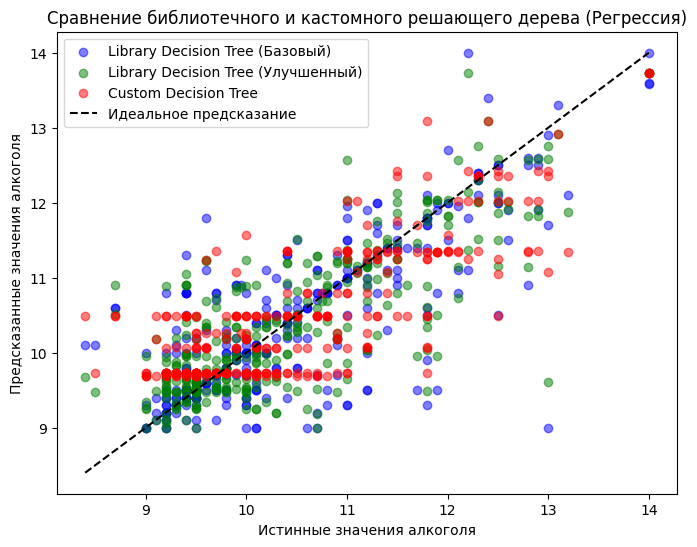

In [32]:
# Оценка качества кастомного решающего дерева (Классификация)
f1_custom_tree_clf = f1_score(y_test_clf, y_pred_custom_tree_clf)

# Сравнение дефолтной, улучшенной и кастомной реализаций решающего дерева
print("\nСравнение всех версий решающего дерева:\n")

# Классификация
print(f"Library Decision Tree Accuracy (базовая): {accuracy_tree_clf:.4f}, Library Decision Tree Accuracy (улучшенная): {accuracy_tree_clf_optimized:.4f}, Custom Decision Tree Accuracy: {accuracy_custom_tree_clf:.4f}")
print(f"Library Decision Tree F1-Score (базовая): {f1_tree_clf:.4f}, Library Decision Tree F1-Score (улучшенная): {f1_tree_clf_optimized:.4f}, Custom Decision Tree F1-Score: {f1_custom_tree_clf:.4f}")

# Регрессия
print(f"Library Decision Tree MSE (базовая): {mse_tree_reg:.6f}, Library Decision Tree MSE (улучшенная): {mse_tree_reg_optimized:.6f}, Custom Decision Tree MSE: {mse_custom_tree_reg:.6f}")

# Визуализация предсказаний библиотечной и кастомной моделей (регрессия)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_tree_reg, alpha=0.5, label="Library Decision Tree (Базовый)", color="blue")
plt.scatter(y_test_reg, y_pred_tree_reg_optimized, alpha=0.5, label="Library Decision Tree (Улучшенный)", color="green")
plt.scatter(y_test_reg, y_pred_custom_tree_reg, alpha=0.5, label="Custom Decision Tree", color="red")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color="black", linestyle="--", label="Идеальное предсказание")
plt.xlabel("Истинные значения алкоголя")
plt.ylabel("Предсказанные значения алкоголя")
plt.title("Сравнение библиотечного и кастомного решающего дерева (Регрессия)")
plt.legend()
plt.show()


# Алгоритм Случайный  лес

In [33]:
# Определение данных для регрессии
X_regression = data.drop(columns=['alcohol'])
y_regression = data['alcohol']

# Просмотр первых строк
X_regression.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0


In [34]:
# Определение данных для регрессии
X_regression = data.drop(columns=['alcohol'])
y_regression = data['alcohol']

# Просмотр первых строк
X_regression.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,quality_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,0


In [35]:
print("Выбранные метрики качества:")
print("- Accuracy (для классификации) – общая точность модели")
print("- F1-Score (для классификации) – баланс точности и полноты")
print("- Mean Squared Error (MSE) (для регрессии) – средняя ошибка предсказания")


Выбранные метрики качества:
- Accuracy (для классификации) – общая точность модели
- F1-Score (для классификации) – баланс точности и полноты
- Mean Squared Error (MSE) (для регрессии) – средняя ошибка предсказания


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных для классификации
X_classification = data.drop(columns=['quality', 'quality_binary'])
y_classification = data['quality_binary']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

# Разделение данных для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


In [37]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Классификация: Случайный лес
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf_scaled)

accuracy_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
f1_rf_clf = f1_score(y_test_clf, y_pred_rf_clf)

print(f"Бейзлайн Случайный Лес (Классификация) - Accuracy: {accuracy_rf_clf:.4f}, F1 Score: {f1_rf_clf:.4f}")

# Регрессия: Случайный лес
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg_scaled)

mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)

print(f"Бейзлайн Случайный Лес (Регрессия) - MSE: {mse_rf_reg:.6f}")


Бейзлайн Случайный Лес (Классификация) - Accuracy: 0.7875, F1 Score: 0.8101
Бейзлайн Случайный Лес (Регрессия) - MSE: 0.263621


In [38]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для классификации
param_grid_rf_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf_clf, cv=5, scoring='accuracy')
grid_search_rf_clf.fit(X_train_clf_scaled, y_train_clf)
best_params_rf_clf = grid_search_rf_clf.best_params_

# Подбор гиперпараметров для регрессии
param_grid_rf_reg = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_rf_reg.fit(X_train_reg_scaled, y_train_reg)
best_params_rf_reg = grid_search_rf_reg.best_params_

print(f"Лучшие параметры для Случайного Леса (Классификация): {best_params_rf_clf}")
print(f"Лучшие параметры для Случайного Леса (Регрессия): {best_params_rf_reg}")


Лучшие параметры для Случайного Леса (Классификация): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Лучшие параметры для Случайного Леса (Регрессия): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# Обучение модели с улучшенным бейзлайном (Классификация)
rf_clf_optimized = RandomForestClassifier(**best_params_rf_clf, random_state=42)
rf_clf_optimized.fit(X_train_clf_scaled, y_train_clf)
y_pred_rf_clf_optimized = rf_clf_optimized.predict(X_test_clf_scaled)

# Оценка качества модели (Классификация)
accuracy_rf_clf_optimized = accuracy_score(y_test_clf, y_pred_rf_clf_optimized)
f1_rf_clf_optimized = f1_score(y_test_clf, y_pred_rf_clf_optimized)

print(f"Оптимизированный Случайный Лес (Классификация) - Accuracy: {accuracy_rf_clf_optimized:.4f}, F1 Score: {f1_rf_clf_optimized:.4f}")

# Обучение модели с улучшенным бейзлайном (Регрессия)
rf_reg_optimized = RandomForestRegressor(**best_params_rf_reg, random_state=42)
rf_reg_optimized.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg_optimized = rf_reg_optimized.predict(X_test_reg_scaled)

# Оценка качества модели (Регрессия)
mse_rf_reg_optimized = mean_squared_error(y_test_reg, y_pred_rf_reg_optimized)

print(f"Оптимизированный Случайный Лес (Регрессия) - MSE: {mse_rf_reg_optimized:.6f}")


Оптимизированный Случайный Лес (Классификация) - Accuracy: 0.7906, F1 Score: 0.8134
Оптимизированный Случайный Лес (Регрессия) - MSE: 0.258929


In [40]:
print("\nСравнение случайного леса до и после оптимизации:")

# Классификация
print(f"Бейзлайн Accuracy: {accuracy_rf_clf:.4f}, Улучшенный Accuracy: {accuracy_rf_clf_optimized:.4f}")
print(f"Бейзлайн F1-Score: {f1_rf_clf:.4f}, Улучшенный F1-Score: {f1_rf_clf_optimized:.4f}")

# Регрессия
print(f"Бейзлайн MSE: {mse_rf_reg:.6f}, Улучшенный MSE: {mse_rf_reg_optimized:.6f}")



Сравнение случайного леса до и после оптимизации:
Бейзлайн Accuracy: 0.7875, Улучшенный Accuracy: 0.7906
Бейзлайн F1-Score: 0.8101, Улучшенный F1-Score: 0.8134
Бейзлайн MSE: 0.263621, Улучшенный MSE: 0.258929


In [41]:
import numpy as np
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

class CustomRandomForest:
    def __init__(self, n_estimators=10, max_depth=None, min_samples_split=2, mode='classification'):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.mode = mode
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            X_bootstrap, y_bootstrap = resample(X, y)

            # Выбор модели: классификация или регрессия
            if self.mode == 'classification':
                tree = DecisionTreeClassifier(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            else:  # mode == 'regression'
                tree = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)

            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        
        if self.mode == 'classification':
            return np.round(np.mean(predictions, axis=0))  # Голосование по большинству
        else:
            return np.mean(predictions, axis=0)  # Усреднение предсказаний


In [42]:
# Кастомный случайный лес (Классификация)
custom_rf_clf = CustomRandomForest(n_estimators=10, max_depth=5, mode='classification')
custom_rf_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_custom_rf_clf = custom_rf_clf.predict(X_test_clf_scaled)

accuracy_custom_rf_clf = accuracy_score(y_test_clf, y_pred_custom_rf_clf)
print(f"Кастомный Случайный Лес (Классификация) - Accuracy: {accuracy_custom_rf_clf:.4f}")

# Кастомный случайный лес (Регрессия)
custom_rf_reg = CustomRandomForest(n_estimators=10, max_depth=5, mode='regression')
custom_rf_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_custom_rf_reg = custom_rf_reg.predict(X_test_reg_scaled)

mse_custom_rf_reg = mean_squared_error(y_test_reg, y_pred_custom_rf_reg)
print(f"Кастомный Случайный Лес (Регрессия) - MSE: {mse_custom_rf_reg:.6f}")


Кастомный Случайный Лес (Классификация) - Accuracy: 0.7219
Кастомный Случайный Лес (Регрессия) - MSE: 0.407392



Сравнение всех версий случайного леса:

Library RF Accuracy (базовая): 0.7875, Library RF Accuracy (улучшенная): 0.7906, Custom RF Accuracy: 0.7219
Library RF F1-Score (базовая): 0.8101, Library RF F1-Score (улучшенная): 0.8134, Custom RF F1-Score: 0.7390
Library RF MSE (базовая): 0.263621, Library RF MSE (улучшенная): 0.258929, Custom RF MSE: 0.407392


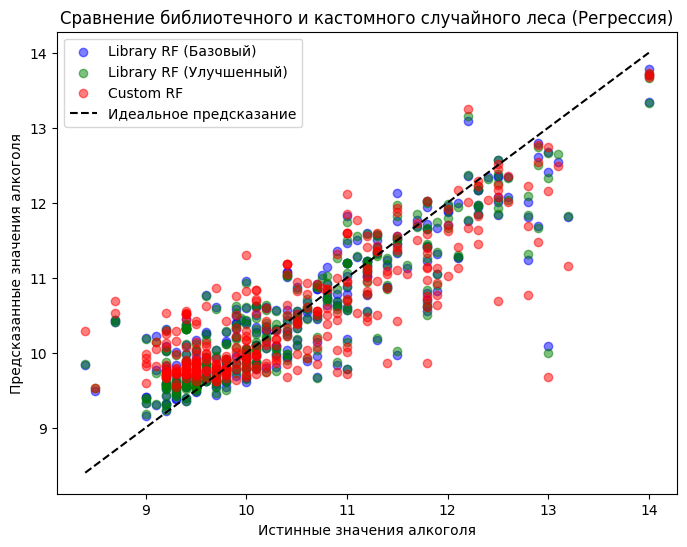

In [43]:
# Оценка качества кастомного случайного леса (Классификация)
f1_custom_rf_clf = f1_score(y_test_clf, y_pred_custom_rf_clf)

# Сравнение дефолтной, улучшенной и кастомной реализаций случайного леса
print("\nСравнение всех версий случайного леса:\n")

# Классификация
print(f"Library RF Accuracy (базовая): {accuracy_rf_clf:.4f}, Library RF Accuracy (улучшенная): {accuracy_rf_clf_optimized:.4f}, Custom RF Accuracy: {accuracy_custom_rf_clf:.4f}")
print(f"Library RF F1-Score (базовая): {f1_rf_clf:.4f}, Library RF F1-Score (улучшенная): {f1_rf_clf_optimized:.4f}, Custom RF F1-Score: {f1_custom_rf_clf:.4f}")

# Регрессия
print(f"Library RF MSE (базовая): {mse_rf_reg:.6f}, Library RF MSE (улучшенная): {mse_rf_reg_optimized:.6f}, Custom RF MSE: {mse_custom_rf_reg:.6f}")

# Визуализация предсказаний библиотечной и кастомной моделей (регрессия)
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.5, label="Library RF (Базовый)", color="blue")
plt.scatter(y_test_reg, y_pred_rf_reg_optimized, alpha=0.5, label="Library RF (Улучшенный)", color="green")
plt.scatter(y_test_reg, y_pred_custom_rf_reg, alpha=0.5, label="Custom RF", color="red")
plt.plot([min(y_test_reg), max(y_test_reg)], [min(y_test_reg), max(y_test_reg)], color="black", linestyle="--", label="Идеальное предсказание")
plt.xlabel("Истинные значения алкоголя")
plt.ylabel("Предсказанные значения алкоголя")
plt.title("Сравнение библиотечного и кастомного случайного леса (Регрессия)")
plt.legend()
plt.show()


# Алгоритм градиентного бустинга

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных для классификации
X_classification = data.drop(columns=['quality', 'quality_binary'])
y_classification = data['quality_binary']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42)

# Разделение данных для регрессии
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
X_train_clf_scaled = scaler.fit_transform(X_train_clf)
X_test_clf_scaled = scaler.transform(X_test_clf)

X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)


In [45]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

# Классификация: Градиентный бустинг
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_gb_clf = gb_clf.predict(X_test_clf_scaled)

accuracy_gb_clf = accuracy_score(y_test_clf, y_pred_gb_clf)
f1_gb_clf = f1_score(y_test_clf, y_pred_gb_clf)

print(f"Градиентный бустинг (Классификация) - Accuracy: {accuracy_gb_clf:.4f}, F1 Score: {f1_gb_clf:.4f}")

# Регрессия: Градиентный бустинг
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_gb_reg = gb_reg.predict(X_test_reg_scaled)

mse_gb_reg = mean_squared_error(y_test_reg, y_pred_gb_reg)

print(f"Градиентный бустинг (Регрессия) - MSE: {mse_gb_reg:.6f}")


Градиентный бустинг (Классификация) - Accuracy: 0.7625, F1 Score: 0.7803
Градиентный бустинг (Регрессия) - MSE: 0.267526


In [46]:
from sklearn.model_selection import GridSearchCV

# Подбор гиперпараметров для классификации
param_grid_gb_clf = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_search_gb_clf = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb_clf, cv=5, scoring='accuracy')
grid_search_gb_clf.fit(X_train_clf_scaled, y_train_clf)
best_params_gb_clf = grid_search_gb_clf.best_params_

# Подбор гиперпараметров для регрессии
param_grid_gb_reg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

grid_search_gb_reg = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb_reg, cv=5, scoring='neg_mean_squared_error')
grid_search_gb_reg.fit(X_train_reg_scaled, y_train_reg)
best_params_gb_reg = grid_search_gb_reg.best_params_

print(f"Лучшие параметры для градиентного бустинга (Классификация): {best_params_gb_clf}")
print(f"Лучшие параметры для градиентного бустинга (Регрессия): {best_params_gb_reg}")


Лучшие параметры для градиентного бустинга (Классификация): {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Лучшие параметры для градиентного бустинга (Регрессия): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [47]:
# Классификация
gb_clf_optimized = GradientBoostingClassifier(**best_params_gb_clf, random_state=42)
gb_clf_optimized.fit(X_train_clf_scaled, y_train_clf)
y_pred_gb_clf_optimized = gb_clf_optimized.predict(X_test_clf_scaled)

accuracy_gb_clf_optimized = accuracy_score(y_test_clf, y_pred_gb_clf_optimized)
f1_gb_clf_optimized = f1_score(y_test_clf, y_pred_gb_clf_optimized)

print(f"Оптимизированный Градиентный бустинг (Классификация) - Accuracy: {accuracy_gb_clf_optimized:.4f}, F1 Score: {f1_gb_clf_optimized:.4f}")

# Регрессия
gb_reg_optimized = GradientBoostingRegressor(**best_params_gb_reg, random_state=42)
gb_reg_optimized.fit(X_train_reg_scaled, y_train_reg)
y_pred_gb_reg_optimized = gb_reg_optimized.predict(X_test_reg_scaled)

mse_gb_reg_optimized = mean_squared_error(y_test_reg, y_pred_gb_reg_optimized)

print(f"Оптимизированный Градиентный бустинг (Регрессия) - MSE: {mse_gb_reg_optimized:.6f}")


Оптимизированный Градиентный бустинг (Классификация) - Accuracy: 0.7937, F1 Score: 0.8156
Оптимизированный Градиентный бустинг (Регрессия) - MSE: 0.214853


In [48]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Кастомный градиентный бустинг
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        """Обучение кастомного градиентного бустинга."""
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction
        self.models = []

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            prediction = tree.predict(X)
            residual -= self.learning_rate * prediction
            self.models.append(tree)

    def predict(self, X):
        """Предсказание значений с помощью обученной модели."""
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Разделение данных на признаки и целевую переменную
X = data.drop(["quality", "alcohol"], axis=1)
y_regression = data["alcohol"]

# Разбиение данных на обучающую и тестовую выборки
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

# Нормализация данных
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Создание и обучение кастомного градиентного бустинга
custom_model = CustomGradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
custom_model.fit(X_train_reg_scaled, y_train_reg)


Имплементация кастомного градиентного бустинга

In [50]:

import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Кастомный градиентный бустинг
class CustomGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        """Обучение кастомного градиентного бустинга."""
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction
        self.models = []

        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            prediction = tree.predict(X)
            residual -= self.learning_rate * prediction
            self.models.append(tree)

    def predict(self, X):
        """Предсказание значений с помощью обученной модели."""
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred


Обучение кастомного градиентного бустинга

In [51]:

# Создание и обучение кастомного градиентного бустинга
custom_model = CustomGradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
custom_model.fit(X_train_reg_scaled, y_train_reg)


Обучение библиотечного градиентного бустинга

In [52]:

from sklearn.ensemble import GradientBoostingRegressor

# Создание и обучение модели GradientBoostingRegressor из sklearn
library_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3, random_state=42)
library_model.fit(X_train_reg_scaled, y_train_reg)


GradientBoostingRegressor(n_estimators=50, random_state=42)

Оценка качества кастомной модели

In [53]:

from sklearn.metrics import mean_squared_error

# Предсказания на тестовых данных
custom_predictions = custom_model.predict(X_test_reg_scaled)

# Вычисление метрик качества
custom_mse = mean_squared_error(y_test_reg, custom_predictions)
custom_r2 = 1 - (np.sum((y_test_reg - custom_predictions) ** 2) / np.sum((y_test_reg - np.mean(y_test_reg)) ** 2))


Оценка качества библиотечной модели

In [54]:

# Предсказания на тестовых данных
library_predictions = library_model.predict(X_test_reg_scaled)

# Вычисление метрик качества
library_mse = mean_squared_error(y_test_reg, library_predictions)
library_r2 = library_model.score(X_test_reg_scaled, y_test_reg)


Подбор гиперпараметров для кастомного градиентного бустинга

In [55]:

# Перебор параметров learning_rate и max_depth
best_mse = float("inf")
best_params = {}

for lr in [0.05, 0.1, 0.2]:
    for depth in [2, 3, 4]:
        model = CustomGradientBoostingRegressor(n_estimators=50, learning_rate=lr, max_depth=depth)
        model.fit(X_train_reg_scaled, y_train_reg)
        predictions = model.predict(X_test_reg_scaled)
        mse = mean_squared_error(y_test_reg, predictions)

        if mse < best_mse:
            best_mse = mse
            best_params = {"learning_rate": lr, "max_depth": depth}

# Создание лучшей модели
optimized_model = CustomGradientBoostingRegressor(n_estimators=50, **best_params)
optimized_model.fit(X_train_reg_scaled, y_train_reg)


Финальное сравнение всех моделей

In [59]:
import pandas as pd
from IPython.display import display

# Создание таблицы с результатами
results = pd.DataFrame({
    "Модель": ["Кастомный бустинг", "Кастомный (оптимизированный)", "Sklearn Gradient Boosting"],
    "MSE": [custom_mse, best_mse, library_mse],
    "R²": [custom_r2, 1 - (best_mse / np.var(y_test_reg)), library_r2]
})

# Вывод таблицы в Jupyter Notebook
print("Сравнение всех моделей:")
display(results)


Сравнение всех моделей:


,Модель,MSE,R²
0,Кастомный бустинг,0.312487,0.748992
1,Кастомный (оптимизированный),0.253297,0.796536
2,Sklearn Gradient Boosting,0.311731,0.749599
